<a href="https://colab.research.google.com/github/melvinps/Schindler-Data-Analysis/blob/main/Callback_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT DATA**


In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from collections import defaultdict

%load_ext google.colab.data_table
%matplotlib inline

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [171]:
df = pd.read_excel('2021 04 28 Daily Callbacks.xlsx')

In [172]:
df = df[['Location','Notification date','Name','Description of technical object','Description','Long Text Description']].dropna()

In [173]:
df['Notification date'] = pd.to_datetime(df['Notification date'])

# **SELECT ROUTE AND CURRENT MONTH**



In [174]:
# Select Route
enter = input('Enter Route: ')
input_route = enter.upper().split(' ')

route_lst = []
for route in input_route:
  route_lst.append('808' + route)

print('Route Selected: ' + str(route_lst))

Enter Route: d01
Route Selected: ['808D01']


In [175]:
# Enter Current Month
m = input('Enter the current month: ')
print('Month selected: ' + m)


Enter the current month: 4
Month selected: 4


In [176]:
# Last 3 months
pass_month = []
count = int(m)
while count > 1:
  pass_month.append(str(count))  
  count = count - 1

print('Pass 3 months: ' + str(pass_month))

Pass 3 months: ['4', '3', '2']


In [177]:
# Callback logs Selected Route
df_route = df.loc[(df['Location']).isin(route_lst)]
# Current month callback logs of Selected Route
df_route_current_month = df_route.loc[df_route['Notification date'].dt.month == int(m)]
# Last 3 months callback logs of Selected Route
df_route_pass_month = df_route.loc[(df_route['Notification date'].dt.month).isin(pass_month)]

In [178]:
# df_route_sick = df.loc[(df['Location'] == route) & (df['Notification date'].dt.month == int(m))]
# df_route = df.loc[(df['Location'] == route)]
# df_route_date = df_route.loc[df_route['Notification date'].dt.month == int(m)]
# df_route_pass_month = df_route.loc[(df_route['Notification date'].dt.month).isin(pass_month)]
# df_route_pass_month

# **TOP 10 SITES WITH HIGHEST CALLBACK IN PASS 3 MONTHS**


In [179]:
top = df_route_pass_month.drop(['Notification date','Location','Long Text Description','Description of technical object'], axis=1)
top.rename({'Description': 'Numbers of Callbacks'}, axis=1, inplace=True)
top.groupby(['Name']).count().sort_values(by=['Numbers of Callbacks'], ascending= False)[0:10]
top_10 = top.groupby(['Name']).count().sort_values(by=['Numbers of Callbacks'], ascending= False)[0:10].reset_index()
top_10

,Name,Numbers of Callbacks
0,BANK OF SINGAPORE,59
1,OCBC CENTRE,55
2,HSBC BUILDING,32
3,THE CENTRAL,30
4,CAPITAL TOWER,28
5,ALTEZ @ ENGGOR,23
6,SINGAPORE GENERAL HOSPITAL,20
7,INTERNATIONAL PLAZA,17
8,79 ANSON ROAD (MCST 2465),16
9,THE CLAN,15


### **Visualization**

**TOP 10 SITES NUMBER OF CALLBACK**

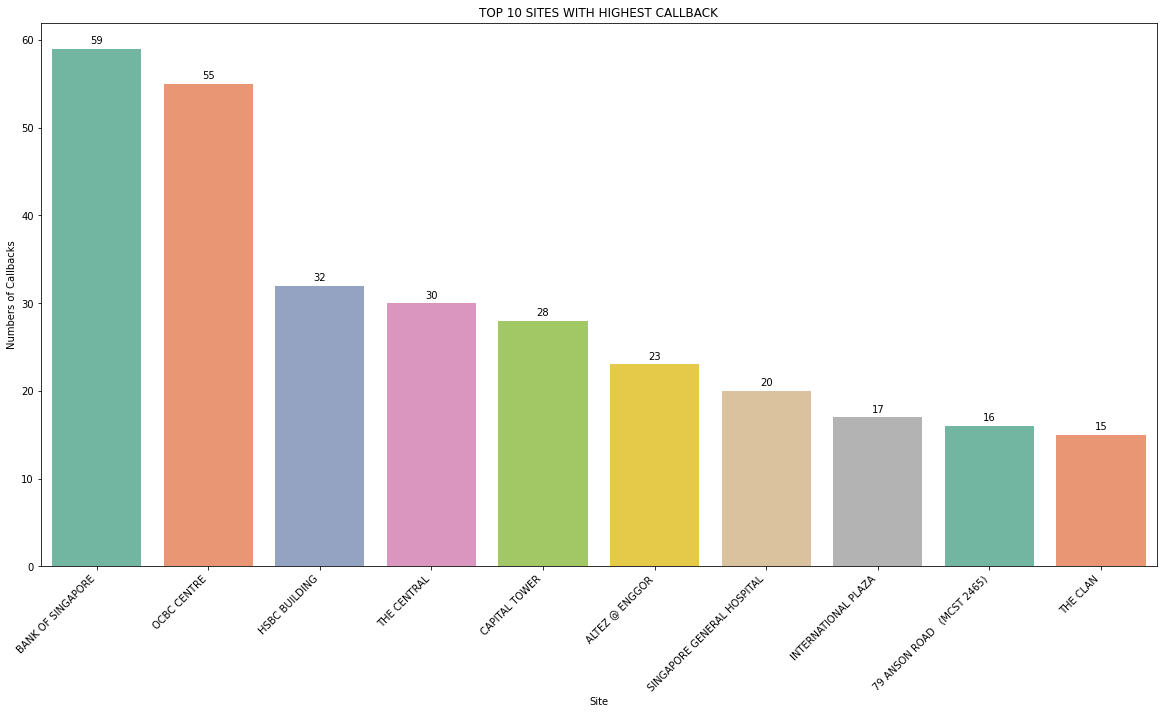

In [180]:
fig, ax = plt.subplots(figsize=(20,10))
g =sns.barplot(x='Name',y='Numbers of Callbacks',data=top_10,ax=ax, palette='Set2')
plt.xticks(rotation=45, ha='right')
g.set_xlabel('Site')
g.set_title('TOP 10 SITES WITH HIGHEST CALLBACK')

for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 8), 
               textcoords = 'offset points')

**NUMBER OF CALLBACK FOR EACH LIFT IN INDIVIDUAL SITE**

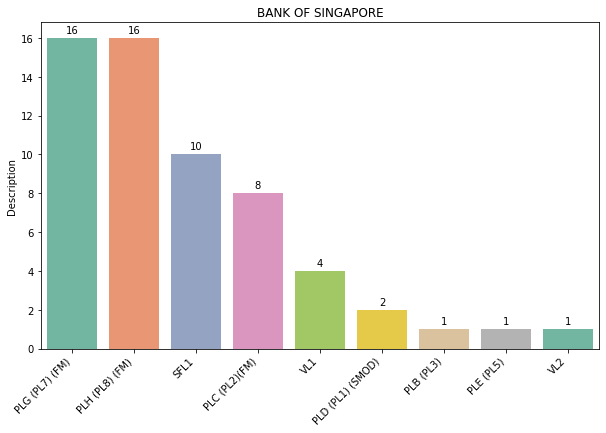

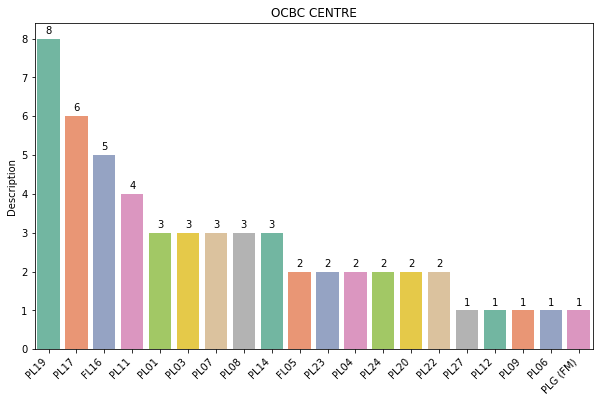

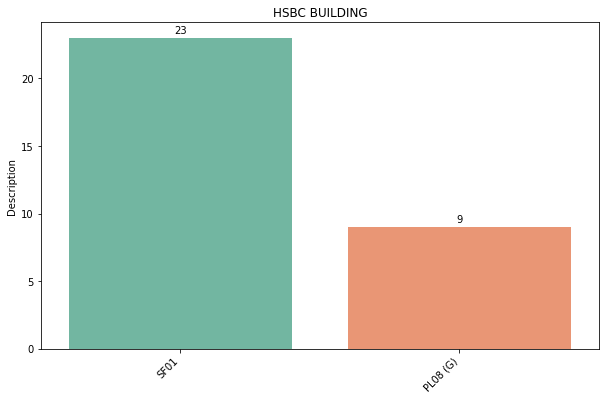

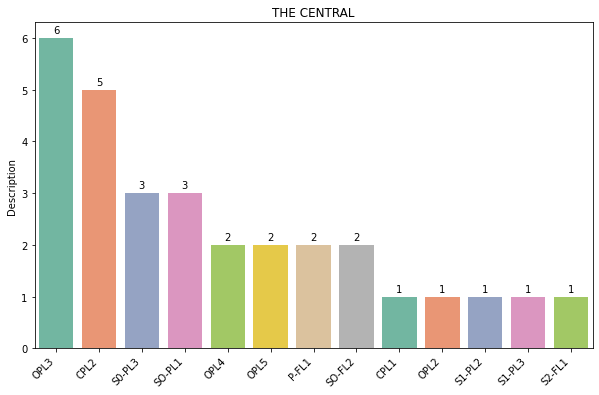

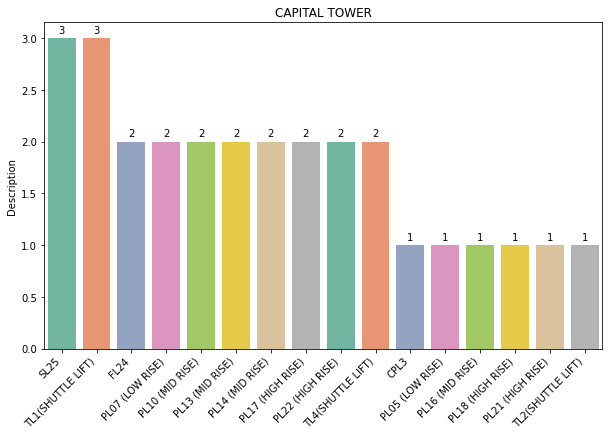

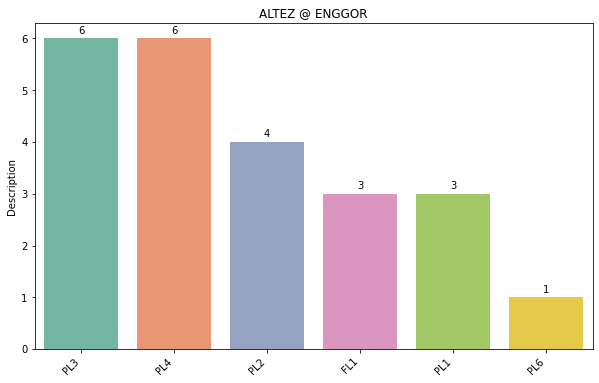

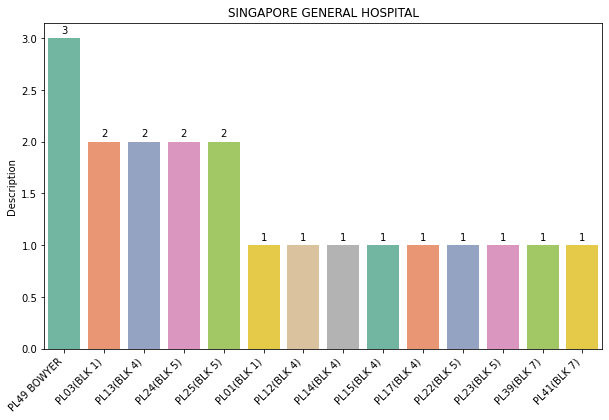

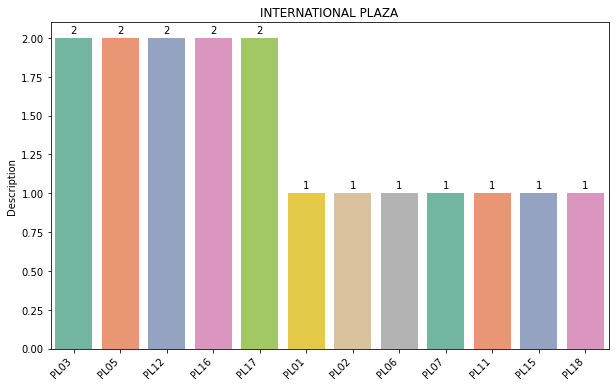

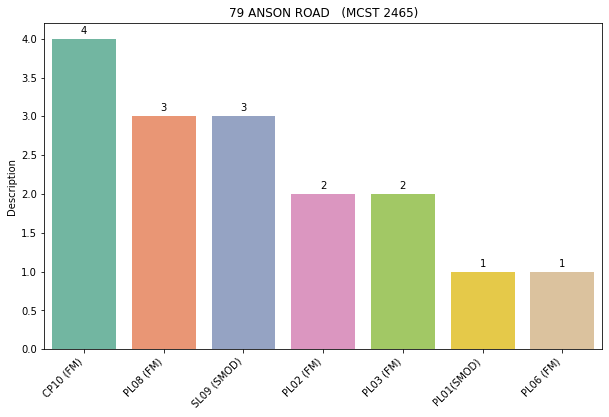

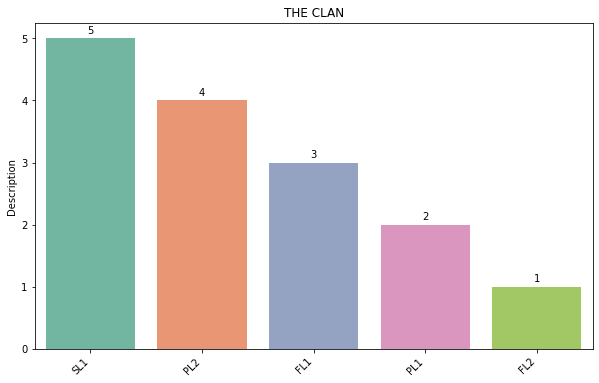

In [181]:
top_10_lst = []
for site in top_10['Name']:
  if site not in top_10_lst:
    top_10_lst.append(site)

df_top_10 = df_route_pass_month.loc[(df_route['Name']).isin(top_10_lst)]
df_top_10 = df_top_10.drop(['Notification date','Location','Long Text Description'], axis=1)
df_top_10 = df_top_10.groupby(['Name'])

for i in top_10_lst:
    gp = df_top_10.get_group(i).groupby(['Description of technical object']).count().sort_values(by=['Description'], ascending= False).reset_index()
    n=len(gp.columns)
    fig,ax = plt.subplots(1, figsize=(10,6))
    f = sns.barplot(x='Description of technical object',y='Description',data=gp, palette='Set2',order=gp['Description of technical object'])
    plt.xticks(rotation=45, ha='right')
    f.set_title(i)
    f.set_xlabel('')
    for p in f.patches:
      f.annotate('{:.0f}'.format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                   xytext = (0, 8), 
                   textcoords = 'offset points')

# **LIFTS WITH HIGHEST CALLBACK IN PASS 3 MONTHS**

In [182]:
top_lift = df_route_pass_month.drop(['Notification date','Location','Long Text Description'], axis=1)
top_lift.rename({'Description': 'Numbers of Callbacks', 'Description of technical object':'Lift'}, axis=1, inplace=True)
df_top = top_lift.groupby(['Name','Lift']).count().sort_values(by=['Numbers of Callbacks'], ascending= False)[0:20]
df_top.reset_index()

,Name,Lift,Numbers of Callbacks
0,HSBC BUILDING,SF01,23
1,BANK OF SINGAPORE,PLG (PL7) (FM),16
2,BANK OF SINGAPORE,PLH (PL8) (FM),16
3,BANK OF SINGAPORE,SFL1,10
4,HSBC BUILDING,PL08 (G),9
5,PEOPLE'S PARK COMPLEX,SL1,8
6,BANK OF SINGAPORE,PLC (PL2)(FM),8
7,OCBC CENTRE,PL19,8
8,RB CAPITAL BUILDING,PL02,8
9,ALTEZ @ ENGGOR,PL4,6


In [ ]:
# temp2 = top_lift.groupby(['Name','Lift']).count().sort_values(by=['Numbers of Callbacks'], ascending= False).reset_index()
# temp = top_lift.groupby(['Name'])

# templst = []
# for site in temp2['Name'][0:20]:
#   if site not in templst:
#     templst.append(site)


# for i in templst:
#     gp = temp.get_group(i).groupby(['Lift']).count().reset_index()
#     n=len(gp.columns)
#     fig,ax = plt.subplots(1, figsize=(10,6))
#     f = sns.barplot(x='Lift',y='Numbers of Callbacks',data=gp, palette='Set2')
#     plt.xticks(rotation=45, ha='right')
#     f.set_title(i)
#     f.set_xlabel('')
#     for p in f.patches:
#       f.annotate('{:.0f}'.format(p.get_height(), '.1f'), 
#                    (p.get_x() + p.get_width() / 2., p.get_height()), 
#                     ha = 'center', va = 'center', 
#                    xytext = (0, 8), 
#                    textcoords = 'offset points')
    


# **SICK UNIT**

In [166]:
df_route_pass_month.groupby(['Location','Name','Description of technical object']).count()
df_route_pass_month['No. of Callbacks'] = df_route_pass_month.groupby(['Location','Name','Description of technical object'])['Notification date'].transform('count')
df_route_pass_month = df_route_pass_month[df_route_pass_month['No. of Callbacks']>=3] 
df_route_pass_month_No_des = df_route_pass_month.drop(['Notification date','Description','Long Text Description'], axis=1)
df_route_pass_month_No_des.groupby(['Location','Name','Description of technical object'],as_index = 'Location').count()



# pd.set_option("display.max_rows", None, "display.max_columns", None)
# print()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


No. of Callbacks
Location Name                      Description of technical object                  
808D01   135 CECIL STREET (2W-LKN) FL01                                            3
                                   PL01                                            3
         20 COLLYER QUAY           PL1(PLA)                                        4
                                   PL5(PLE)                                        3
         78 SHENTON WAY (TWR 1)    PL1                                             6
...                                                                              ...
         THE CLAN                  FL1                                             3
                                   PL2                                             4
                                   SL1                                             5
         THE CLIFT(710-CLIFT)      PL1                                             3
         WISMA ALSAGOFF            SL1                                             4

[62 rows x 1 columns]

**Show Error Description**

In [167]:
df_route_pass_month_with_des = df_route_pass_month.drop(['Notification date','Description'], axis=1)
df_route_pass_month_with_des.groupby(['Location','Name','Description of technical object','Long Text Description'],as_index = 'Location').count()

No. of Callbacks
Location Name                      Description of technical object Long Text Description                                               
808D01   135 CECIL STREET (2W-LKN) FL01                            Error safety T4 check and clean level 1 landing...                 1
                                                                   Error safety T4 check level 4 landing door roll...                 1
                                                                   On arrival no mantrap Error safety T4 check and...                 1
                                   PL01                            Error KB no off stop reset controller print che...                 1
                                                                   Kb not start error need to replace brake mayr                      1
...                                                                                                                                 ...
         THE CLIFT(710-CLIFT)      PL1                             Jthsk breaker trip stop lift fr further checkin                    1
         WISMA ALSAGOFF            SL1                             Lift running on arrival, Tested all floors no f...                 1
                                                                   On arrival test with security up and down no tr...                 1
                                                                   Release 2 person 1750 lift overrun bottom check...                 1
                                                                   Stoer light on. Checked and reset controller. U...                 1

[307 rows x 1 columns]

In [ ]:
df_v = df_route 
df_v['Month'] = df['Notification date'].dt.month
df_v = df_v.drop(['Notification date', 'Long Text Description','Location'], axis=1)
df_v.groupby(['Name','Description of technical object','Month']).count()
temp = df_v.groupby(['Name','Description of technical object','Month']).count().reset_index()
temp1 = temp.iloc[0:20]
temp1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,Description of technical object,Month,Description
0,100 ROBERTSON QUAY,FL3,1,3
1,100 ROBERTSON QUAY,FL3,2,1
2,100 ROBERTSON QUAY,FL5,4,1
3,100 ROBERTSON QUAY,FL7,1,1
4,100 ROBERTSON QUAY,PL4,1,4
5,100 ROBERTSON QUAY,PL4,2,3
6,100 ROBERTSON QUAY,PL4,3,1
7,100 ROBERTSON QUAY,PL6,1,2
8,100 ROBERTSON QUAY,PL6,2,1
9,113 SYED ALWI ROAD,PL1,3,1


In [ ]:
# df_v.groupby(['Name','Description of technical object','Month']).count().plot(kind='bar',figsize=(100, 50) )


In [ ]:
# df_route_date = df_route.loc[df_route['Notification date'].dt.month == int(m)]
# df_route_date = df_route_date.sort_values(by='Notification date')
# temp = df_route_date.drop(['Location', 'Notification date','Long Text Description'], axis=1)
# temp.groupby(['Name','Description of technical object']).count()
